In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [35]:

from os import scandir

def cropfile(pathin,pathout, x, y, w, h,ws):
    img = cv2.imread(pathin)
    if ws:
        cv2.imwrite(pathout, img)
    else:
        test_images.append(img)

#Función para encontrar todas las imagenes que están en un directorio    
def ls1(path):    
    return [obj.name for obj in scandir(path) if obj.is_file()]

#Función para separar el nombre del archivo
def splitfilename(filename):
    sname=""
    sext=""
    i=filename.rfind(".")
    if(i!=0):
        n=len(filename)
        j=n-i-1
        sname=filename[0:i]
        sext=filename[-j:]    
    return sext, sname

#Arreglo de imagenes de prueba
test_images = []

for i in range(1,14):
    path = "Imagenes/Completo/Switch"+str(i)+"/"
    #Files es un arreglo con todos los nombres de las imagenes que están dentro del path
    files=ls1(path)
    j = 0
    for file in files:
        # Es el path + el nombre de la imagen
        filea=path + file # archivo original
        #sext es la extensión y sfilename y es el nombre del archivo sin la extensión
        sext, sfilename = splitfilename(file)    
        #creación del path de archivo ya con el crop
        filec=path+"rename/" + "S"+str(i)+"-"+str(j) + ".png" # archivo crop    
        j +=1
        print(filec)
        cropfile(filea, filec, 250, 90, 300,200,1)
    cropfile(path+files[0],filec,250,90,300,200,0)

    
        



Imagenes/Completo/Switch1/rename/S1-0.png
Imagenes/Completo/Switch1/rename/S1-1.png
Imagenes/Completo/Switch1/rename/S1-2.png
Imagenes/Completo/Switch1/rename/S1-3.png
Imagenes/Completo/Switch1/rename/S1-4.png
Imagenes/Completo/Switch1/rename/S1-5.png
Imagenes/Completo/Switch1/rename/S1-6.png
Imagenes/Completo/Switch1/rename/S1-7.png
Imagenes/Completo/Switch1/rename/S1-8.png
Imagenes/Completo/Switch1/rename/S1-9.png
Imagenes/Completo/Switch1/rename/S1-10.png
Imagenes/Completo/Switch1/rename/S1-11.png
Imagenes/Completo/Switch1/rename/S1-12.png
Imagenes/Completo/Switch1/rename/S1-13.png
Imagenes/Completo/Switch1/rename/S1-14.png
Imagenes/Completo/Switch1/rename/S1-15.png
Imagenes/Completo/Switch1/rename/S1-16.png
Imagenes/Completo/Switch1/rename/S1-17.png
Imagenes/Completo/Switch1/rename/S1-18.png
Imagenes/Completo/Switch1/rename/S1-19.png
Imagenes/Completo/Switch1/rename/S1-20.png
Imagenes/Completo/Switch1/rename/S1-21.png
Imagenes/Completo/Switch1/rename/S1-22.png
Imagenes/Completo/Swi

Imagenes/Completo/Switch7/rename/S7-12.png
Imagenes/Completo/Switch7/rename/S7-13.png
Imagenes/Completo/Switch7/rename/S7-14.png
Imagenes/Completo/Switch7/rename/S7-15.png
Imagenes/Completo/Switch7/rename/S7-16.png
Imagenes/Completo/Switch7/rename/S7-17.png
Imagenes/Completo/Switch7/rename/S7-18.png
Imagenes/Completo/Switch7/rename/S7-19.png
Imagenes/Completo/Switch7/rename/S7-20.png
Imagenes/Completo/Switch7/rename/S7-21.png
Imagenes/Completo/Switch7/rename/S7-22.png
Imagenes/Completo/Switch7/rename/S7-23.png
Imagenes/Completo/Switch7/rename/S7-24.png
Imagenes/Completo/Switch7/rename/S7-25.png
Imagenes/Completo/Switch7/rename/S7-26.png
Imagenes/Completo/Switch7/rename/S7-27.png
Imagenes/Completo/Switch7/rename/S7-28.png
Imagenes/Completo/Switch7/rename/S7-29.png
Imagenes/Completo/Switch7/rename/S7-30.png
Imagenes/Completo/Switch8/rename/S8-0.png
Imagenes/Completo/Switch8/rename/S8-1.png
Imagenes/Completo/Switch8/rename/S8-2.png
Imagenes/Completo/Switch8/rename/S8-3.png
Imagenes/Comple

KeyboardInterrupt: 

## Procesamiento de Imagenes

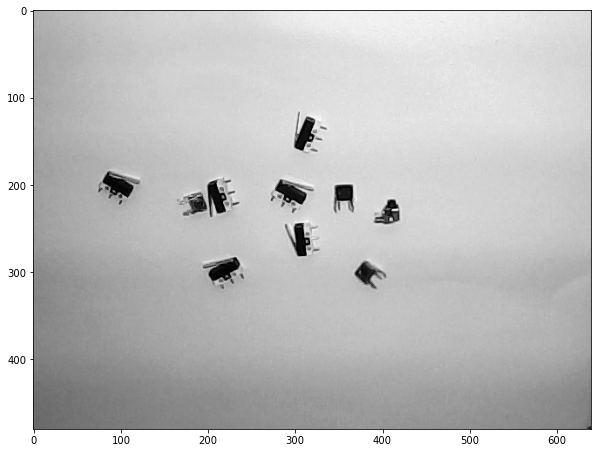

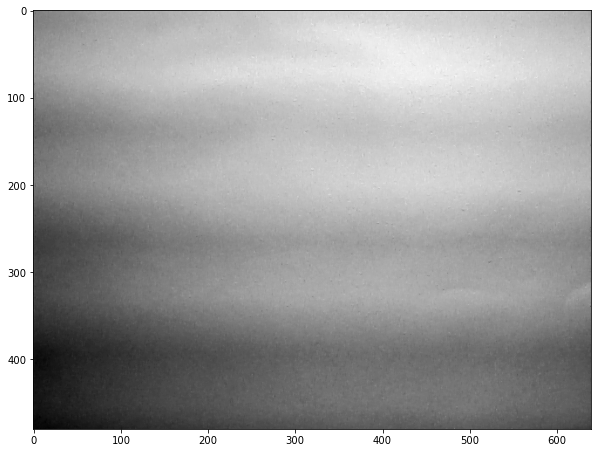

In [421]:
# import cv2
from matplotlib import pyplot as plt

src = cv2.imread("Imagenes/Completo/Escenarios/2.jpeg")
bg = cv2.imread("Imagenes/Completo/Escenarios/background.jpeg")

bg_gray = cv2.cvtColor(bg, cv2.COLOR_BGR2GRAY)
bg_color = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB )

# Convert image to gray and blur it
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
src_color = cv2.cvtColor(src, cv2.COLOR_BGR2RGB )



plt.figure(figsize=[10,10])
plt.imshow(src_gray,cmap=plt.cm.gray)
plt.figure(figsize=[10,10])
plt.imshow(bg_gray,cmap=plt.cm.gray)

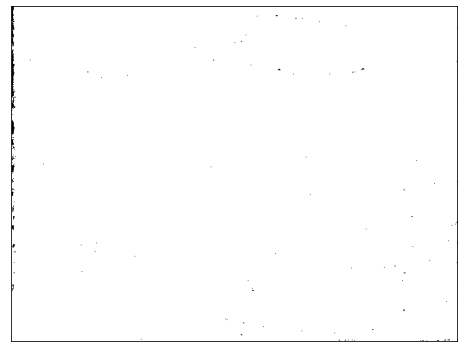

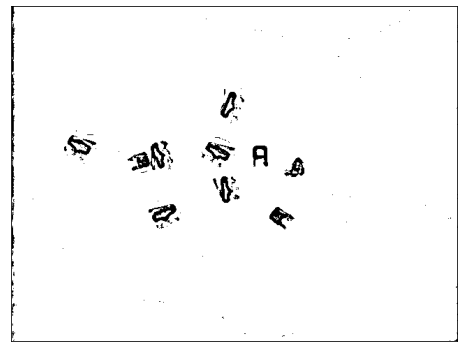

In [422]:
def gaussian(img):
    img = cv2.medianBlur(img,7)
    th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
    return th2
def plotimg(img):
    plt.figure(figsize=[8,8])
    plt.imshow(img, cmap = 'gray')
    
    plt.xticks([]),plt.yticks([])
    plt.show()

bg_filter = gaussian(bg_gray)
plotimg(bg_filter)
src_filter = gaussian(src_gray)
plotimg(src_filter)

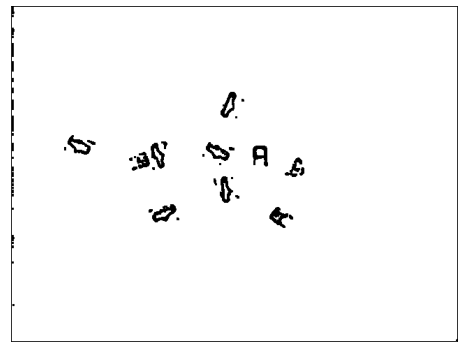

In [423]:
#Closing
kernel = np.ones((3,3),np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

closing = cv2.morphologyEx(src_filter, cv2.MORPH_CLOSE, kernel, iterations = 1)
plotimg(closing)



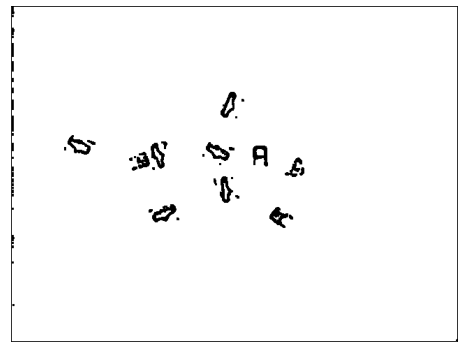

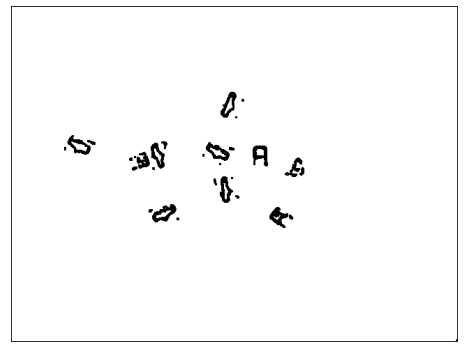

In [424]:
#Binary Treshold 
ret,thresh1 = cv2.threshold(closing,190,255,cv2.THRESH_BINARY)
plotimg(thresh1)
for i in range(len(thresh1)):
    for j in range(5):
        thresh1[i,j] = 255
for i in range(-1,-9,-1):
    for j in range(len(thresh1)):
        thresh1[i,j] = 255
        
plotimg(thresh1)
    


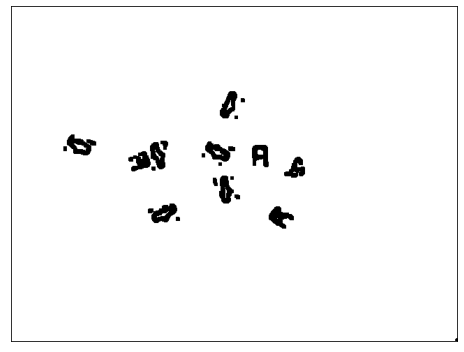

In [425]:
#erode

element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(thresh1,kernel,iterations = 1)
plotimg(erosion)

([<matplotlib.lines.Line2D at 0x254071cc2b0>], Text(0.5, 1.0, 'Histograma'))

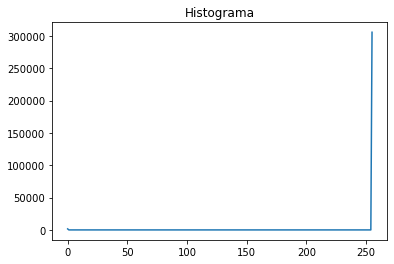

In [173]:
#Histograma Imagen
hist = cv2.calcHist([thresh1],[0],None,[256],[0,256])
plt.plot(hist), plt.title("Histograma")

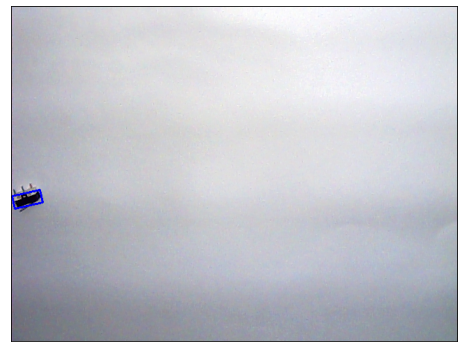

In [318]:
img_copy = thresh1.copy()

contours, hierarchy = cv2.findContours(erosion, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

outer_contours = []
src_color = cv2.cvtColor(src, cv2.COLOR_BGR2RGB )
color_copy = src_color.copy()

for i in range(len(hierarchy[0])):
    if hierarchy[0,i,3] < 1:
        outer_contours.append(contours[i])
    else:
        continue
        

rects = []
h_max = 0
w_max = 0

for i in range(len(outer_contours)):
    
    rect = cv2.minAreaRect(outer_contours[i])
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    
    x ,y ,w, h = area(box)
    if (w*h >= src_color.shape[0]*src_color.shape[1]) or w*h < 250 or w*h > 200000:
        continue
    else:
        cv2.drawContours(src_color,[box],0,(0,0,255),2)
        rect = cv2.minAreaRect(outer_contours[i])
        w,h = rect[1]
        x,y = rect[0]
        if w+x > w_max:
            w_max = w+x
        elif y+h > h_max:
            h_max = h+y
        rects.append(rect)
        

        




        
plotimg(src_color)

In [205]:
print(h_max, w_max)

287.0 499.3357391357422


In [199]:
#Crop de Imagenes 


#Funcion para calcular W y H
def area(box):
    x = box[0,1]
    y = box[0,0]
    dx1 = box[0,1]-box[3,1]
    dy1 = box[0,0]-box[3,0]
    dx2 = box[0,1]-box[1,1]
    dy2 = box[0,0]-box[1,0]
    w   = (dx1**2+dy1**2)**(1/2)
    h   = (dx2**2+dy2**2)**(1/2)
    return x,y,w,h
    

In [333]:
angle

78.11134338378906

ValueError: zero-size array to reduction operation minimum which has no identity

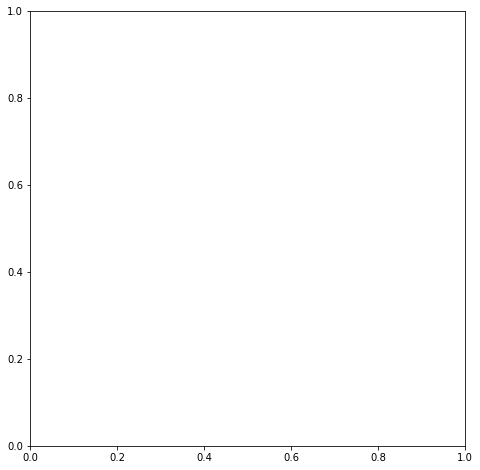

In [319]:
h_max=0
w_max=0
crop_images = []
for i in range(len(rects)):
    #cropimage(src_color,area)
    # rotate img
    rect = rects[i]
    angle = rect[2]
    rows,cols = color_copy.shape[0], color_copy.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(color_copy,M,(cols,rows))

    # rotate bounding box
    rect0 = (rect[0], rect[1], 0.0)
    box = cv2.boxPoints(rect)
    pts = np.int0(cv2.transform(np.array([box]), M))[0]    
    pts[pts < 0] = 0

    # crop
    img_crop = img_rot[pts[1][1]:pts[0][1], 
                   pts[1][0]:pts[2][0]]
    crop_images.append(img_crop)
    plotimg(img_crop)
    
    w = len(img_crop)
    h = len(img_crop[0])
    if w > w_max:
        w_max = w
    if h > h_max:
        h_max = h
print(h_max, w_max)
    
    

In [265]:
blank = np.zeros((100, 100,3), dtype = 'uint8')*255

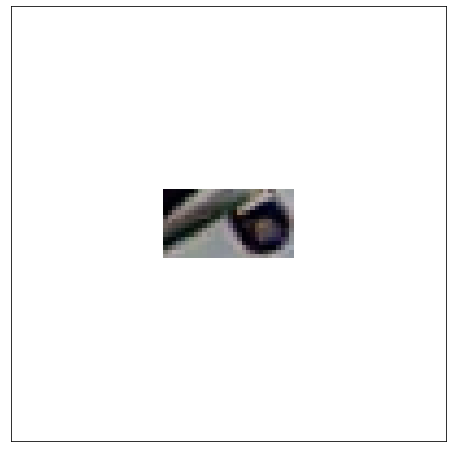

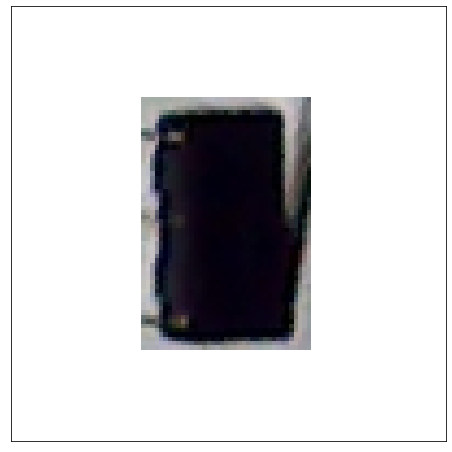

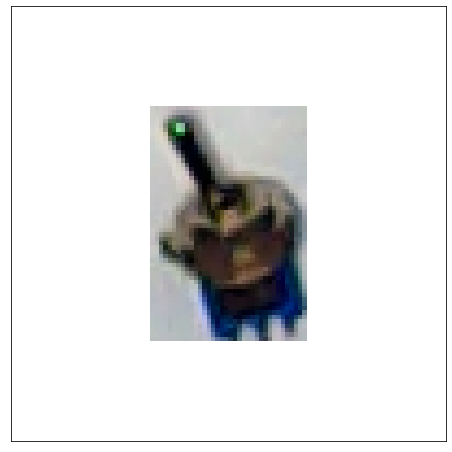

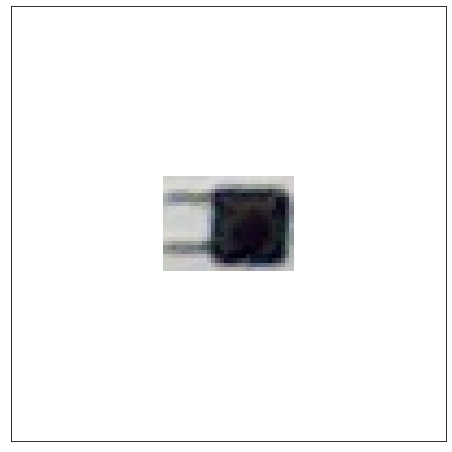

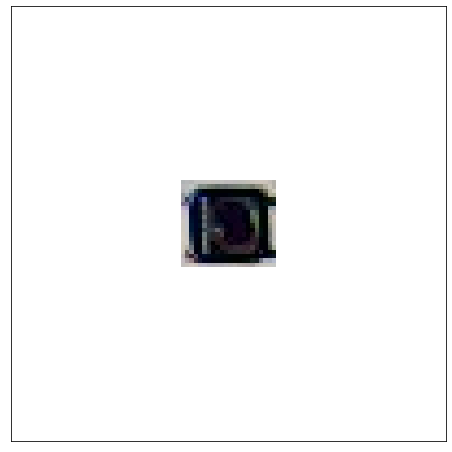

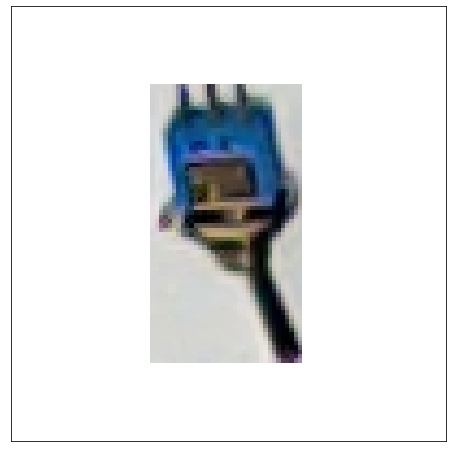

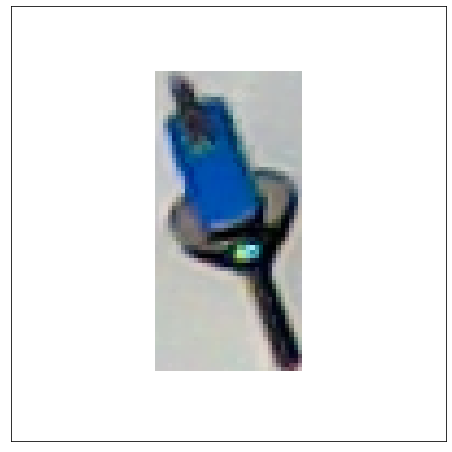

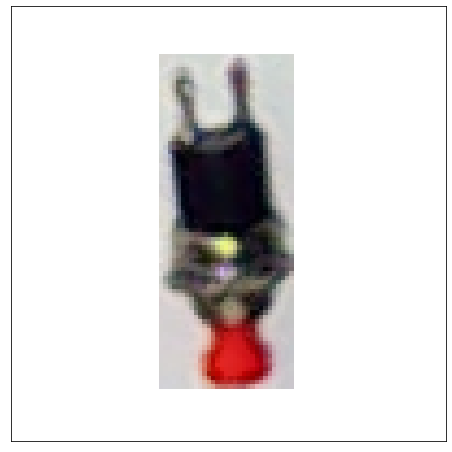

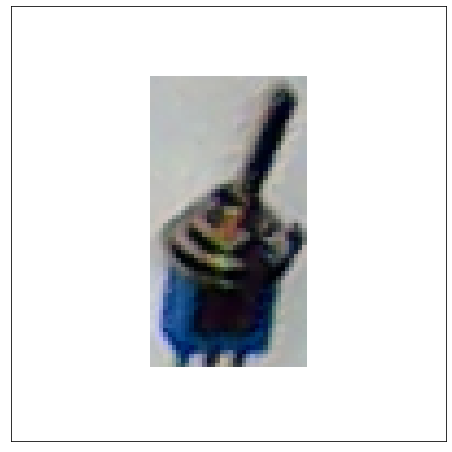

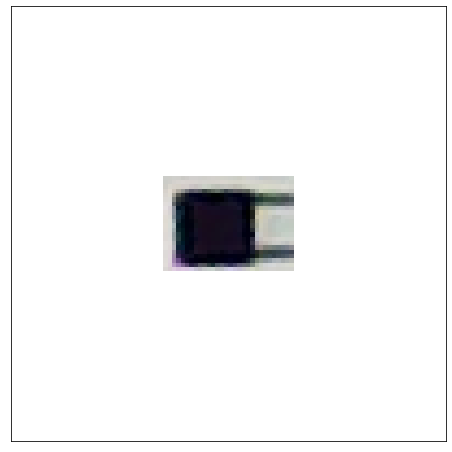

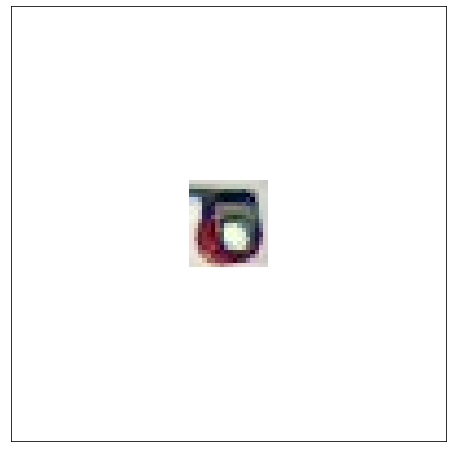

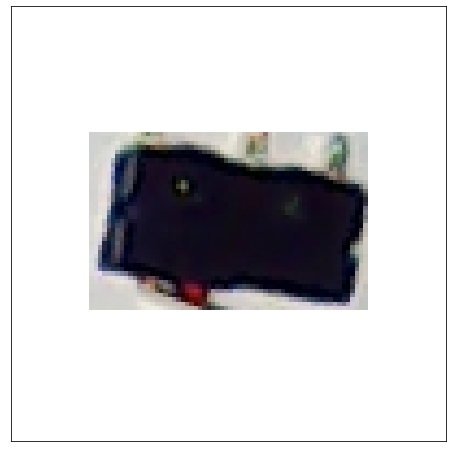

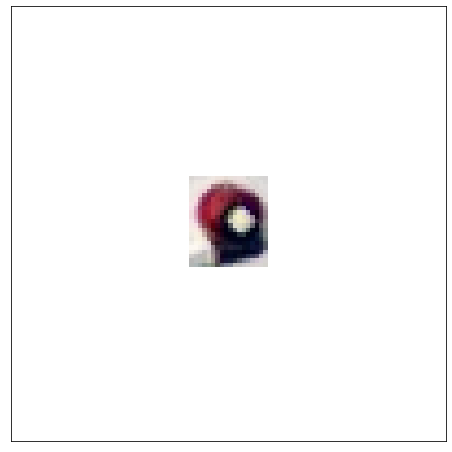

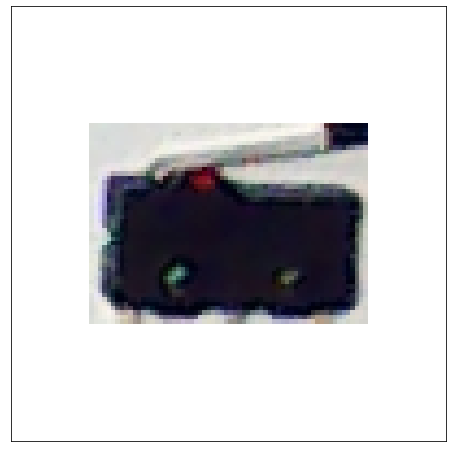

In [285]:
#Imagenes normalizadas
norm_images = []
for img in crop_images:
    blank = np.ones((100, 100,3), dtype = 'uint8')*255
    w1 = 100
    h1 = 100
    w2 = len(img[1])
    h2 = len(img)
    x_ini = (w1-w2)//2
    y_ini = (h1-h2)//2
    for i in range(len(img)):
        for j in range(len(img[1])):
            for k in range(3):
                blank[x_ini+j][y_ini+i][k] = img[i][j][k]
    norm_images.append(blank)
    plotimg(blank)
    


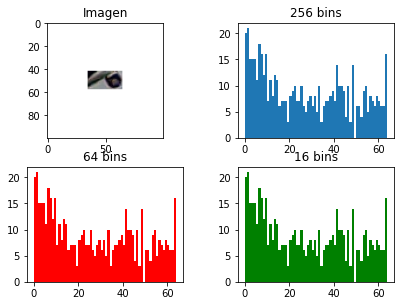

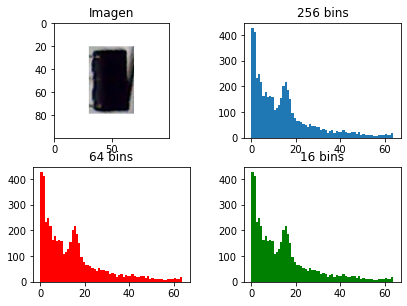

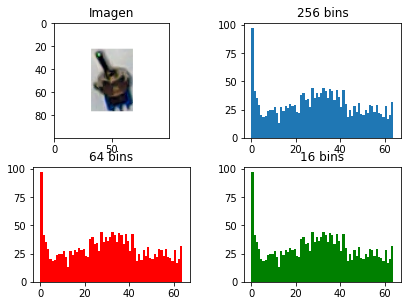

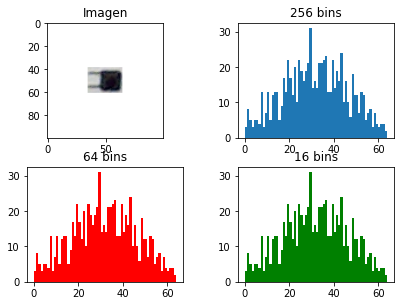

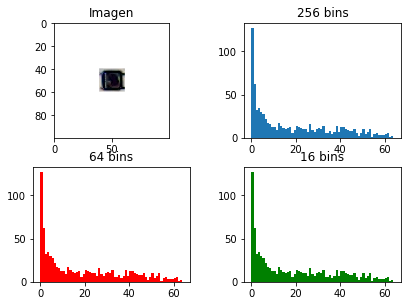

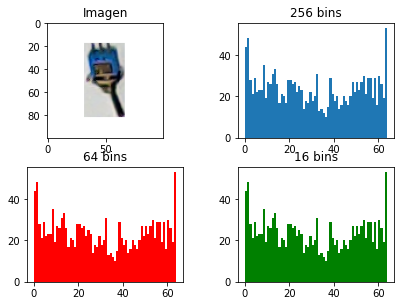

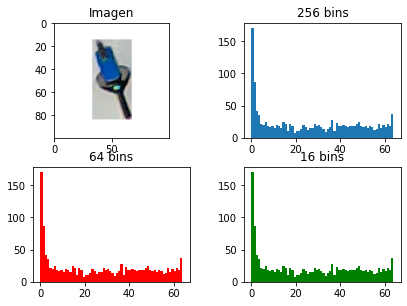

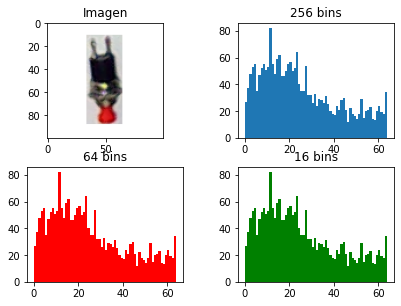

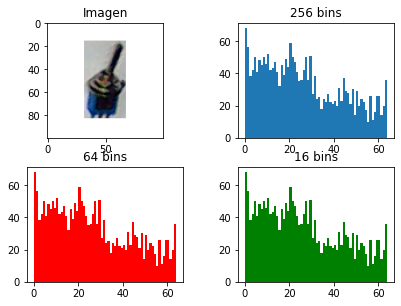

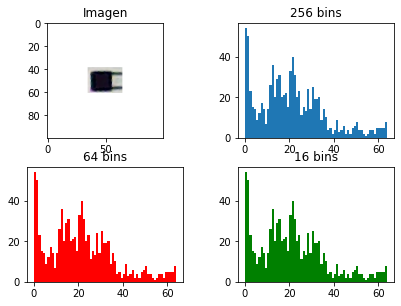

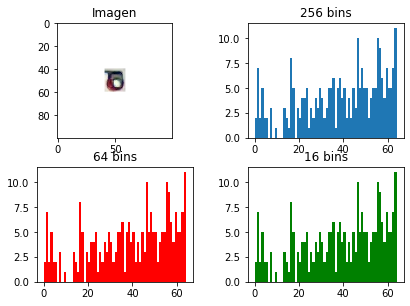

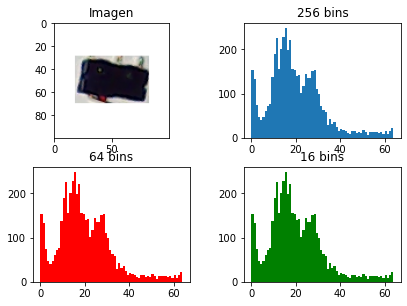

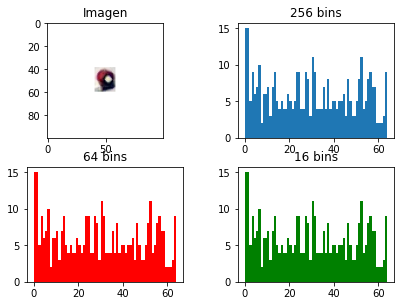

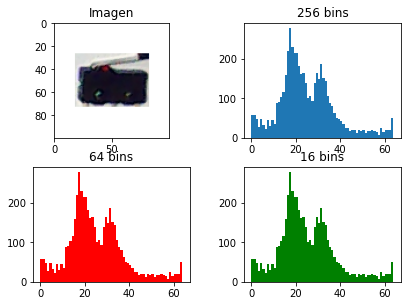

In [291]:
#Histogramas
for ima1 in norm_images:
    
    plt.subplot(221), plt.imshow(ima1, cmap='gray'),plt.title('Imagen')
    plt.subplot(222),plt.hist(ima1.ravel(),64,[0,64]),plt.title('256 bins')
    plt.subplot(223),plt.hist(ima1.ravel(),64,[0,64],facecolor='r'),plt.title('64 bins')
    plt.subplot(224),plt.hist(ima1.ravel(),64,[0,64],facecolor='g'),plt.title('16 bins')
    plt.subplots_adjust(top=0.95,bottom=0.05,left=0.10,right=0.95,hspace=0.25,wspace=0.35)
    plt.show()

Imagenes/Completo/Switch1/rename/S1-0.png


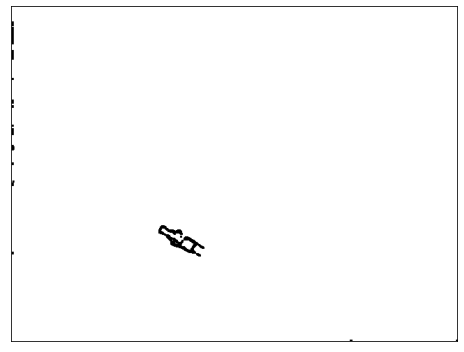

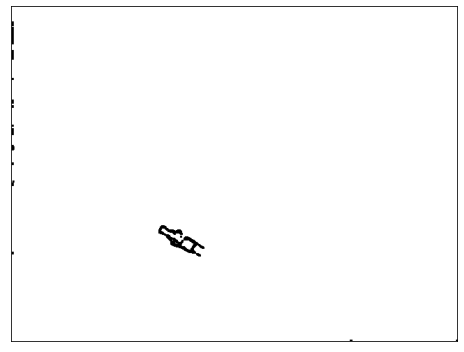

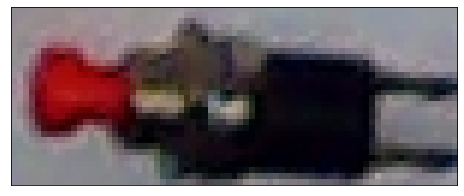

Imagenes/Completo/Switch1/rename/S1-1.png


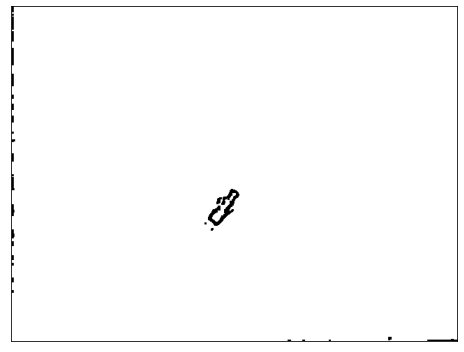

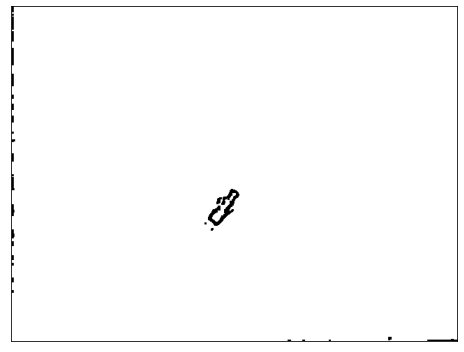

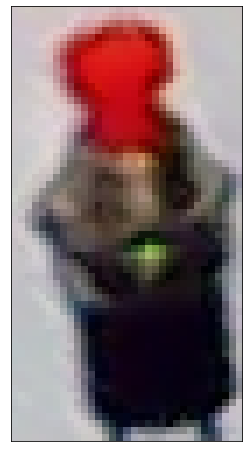

Imagenes/Completo/Switch1/rename/S1-10.png


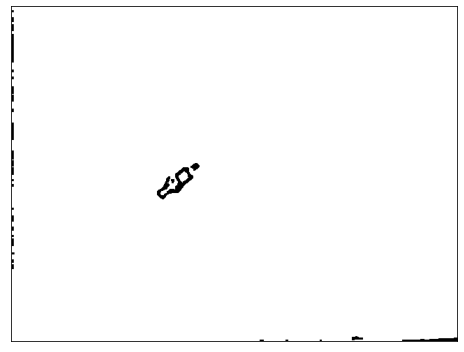

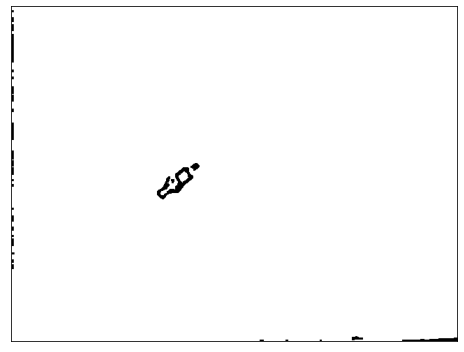

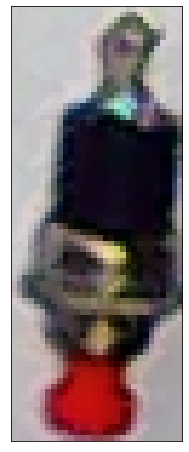

Imagenes/Completo/Switch1/rename/S1-11.png


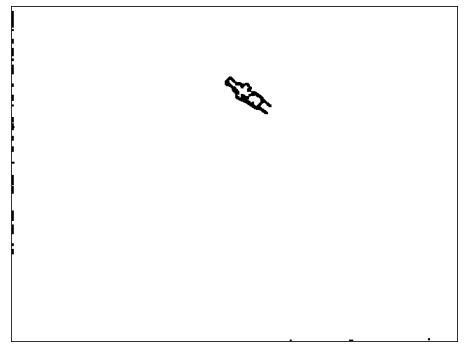

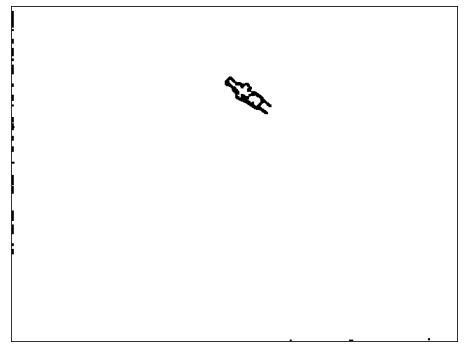

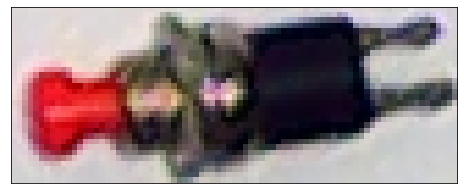

Imagenes/Completo/Switch1/rename/S1-12.png


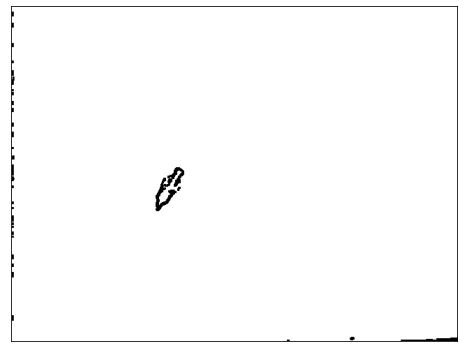

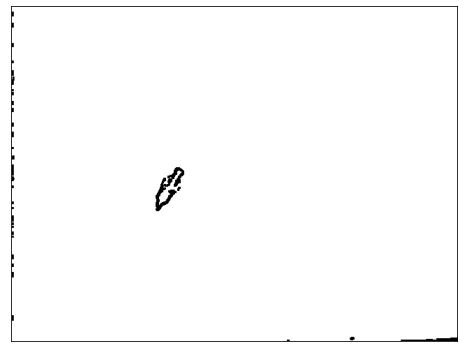

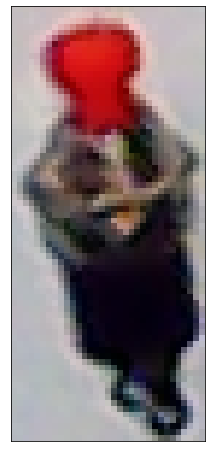

Imagenes/Completo/Switch1/rename/S1-13.png


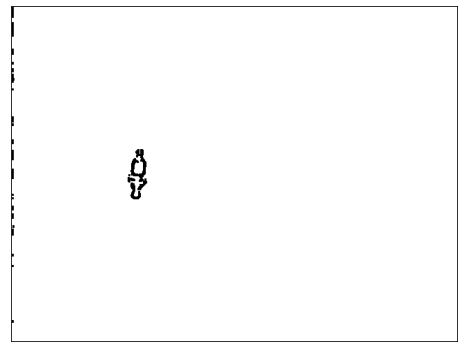

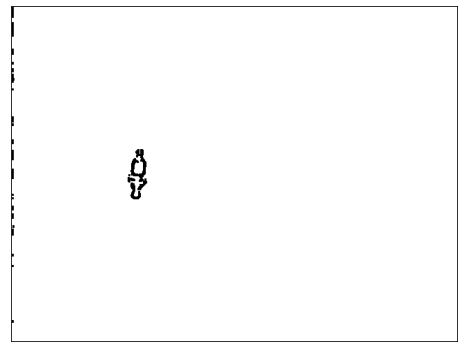

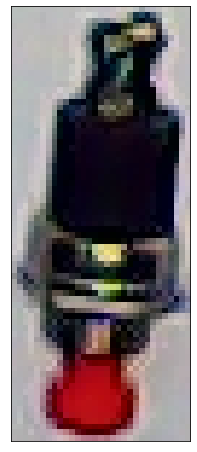

Imagenes/Completo/Switch1/rename/S1-14.png


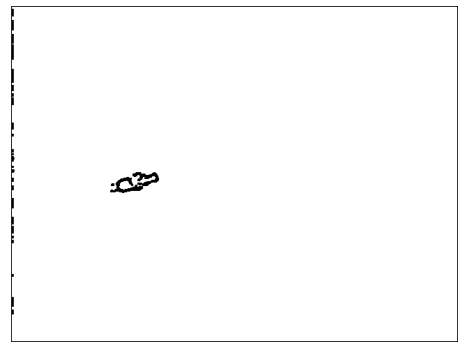

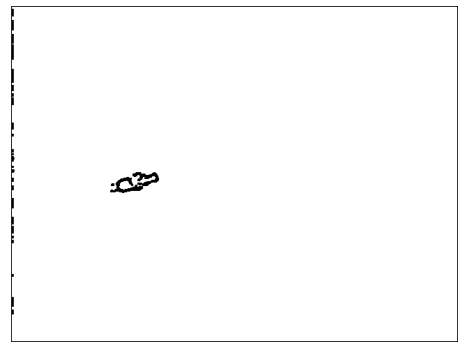

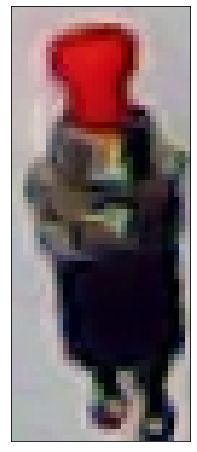

Imagenes/Completo/Switch1/rename/S1-15.png


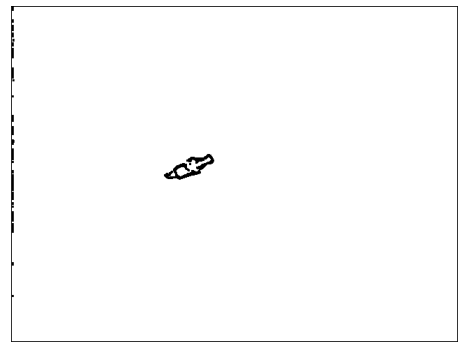

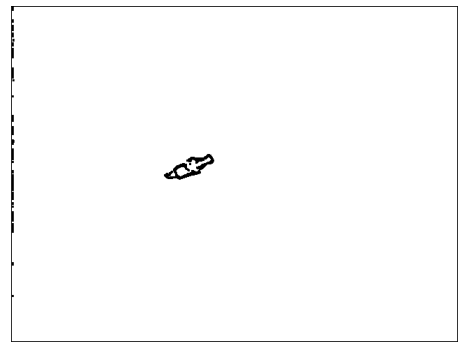

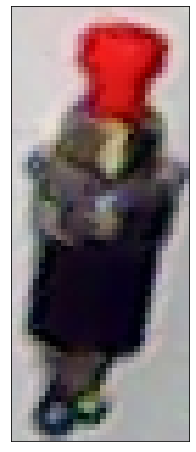

Imagenes/Completo/Switch1/rename/S1-16.png


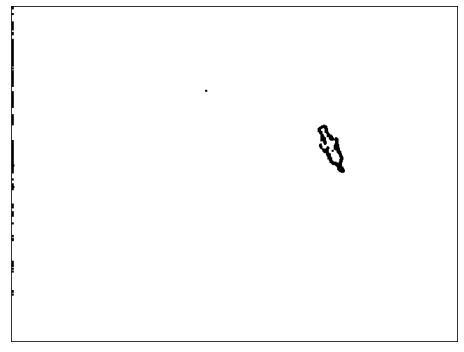

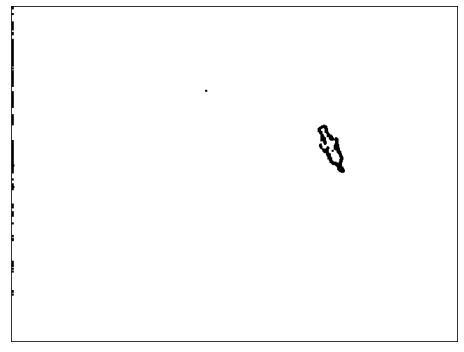

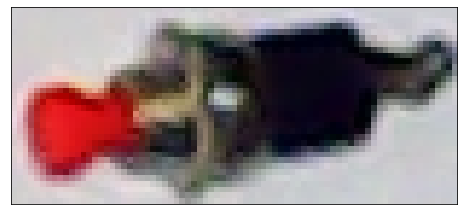

Imagenes/Completo/Switch1/rename/S1-17.png


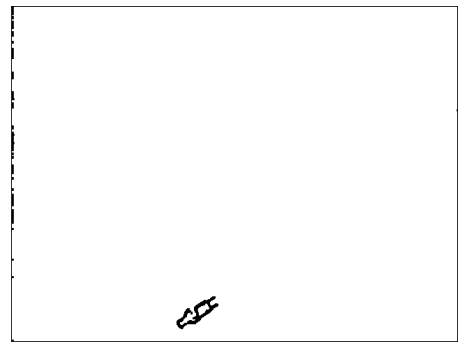

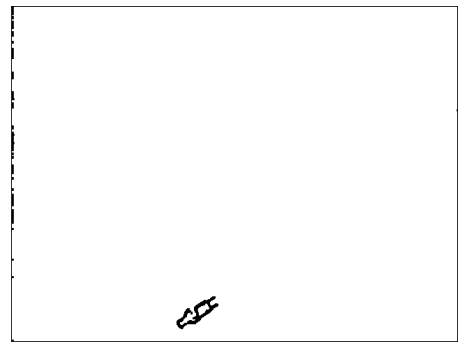

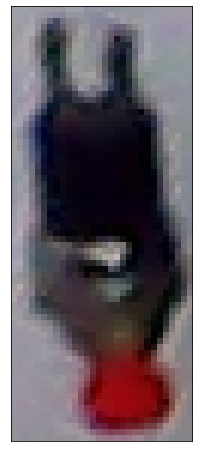

Imagenes/Completo/Switch1/rename/S1-18.png


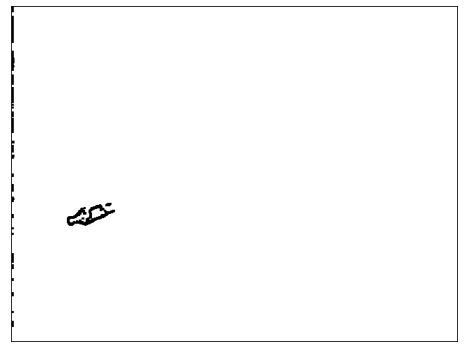

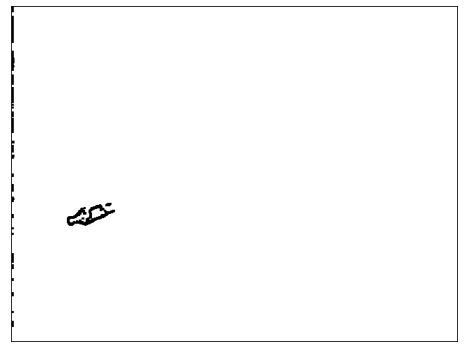

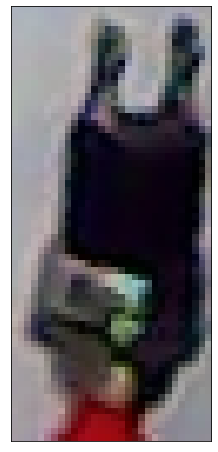

Imagenes/Completo/Switch1/rename/S1-19.png


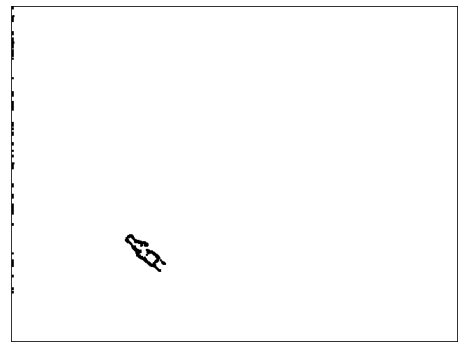

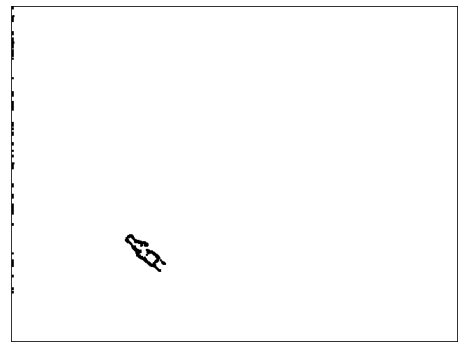

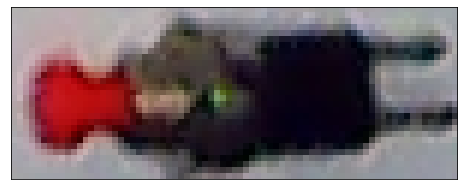

Imagenes/Completo/Switch1/rename/S1-2.png


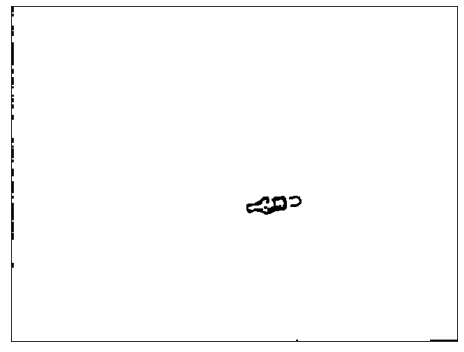

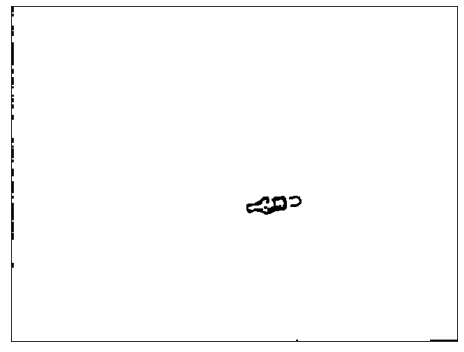

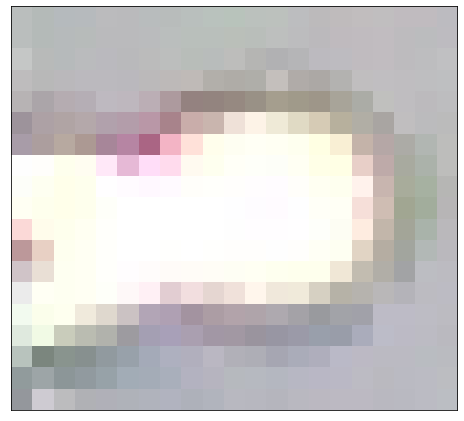

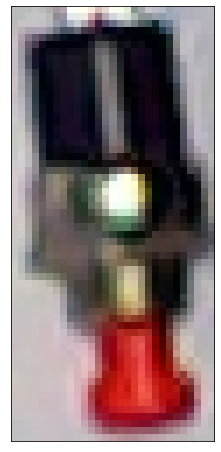

Imagenes/Completo/Switch1/rename/S1-20.png


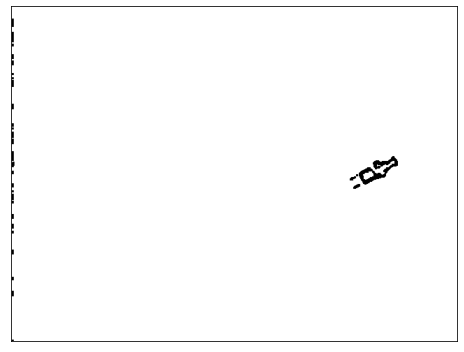

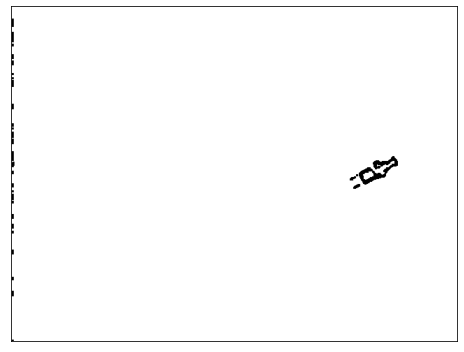

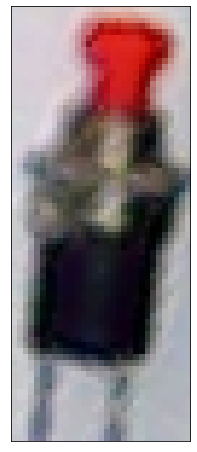

Imagenes/Completo/Switch1/rename/S1-21.png


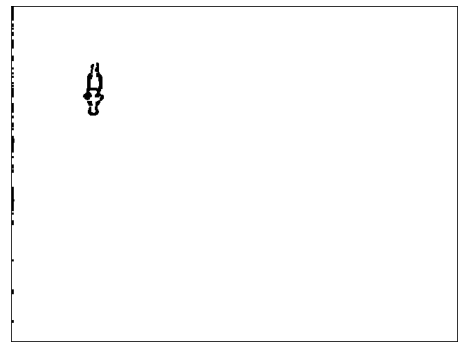

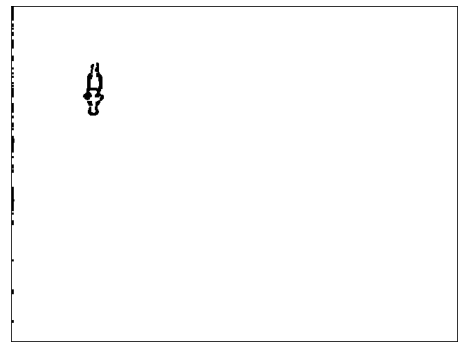

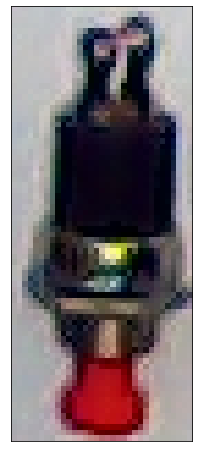

Imagenes/Completo/Switch1/rename/S1-22.png


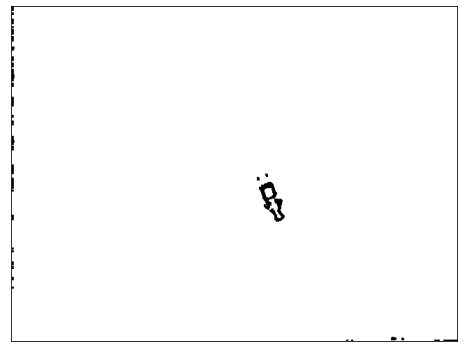

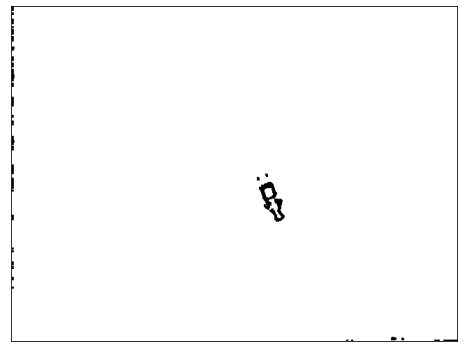

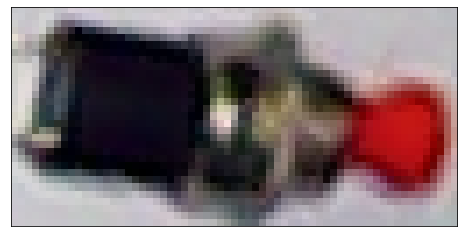

Imagenes/Completo/Switch1/rename/S1-23.png


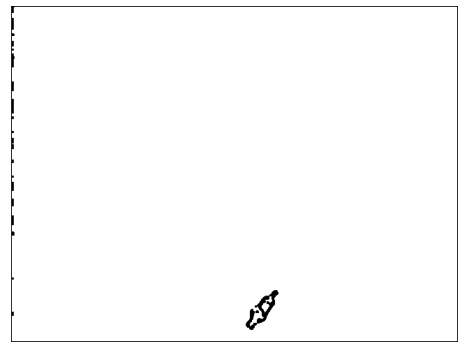

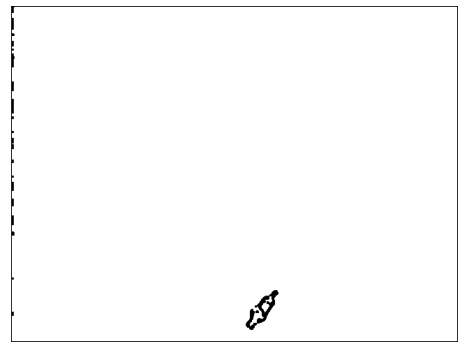

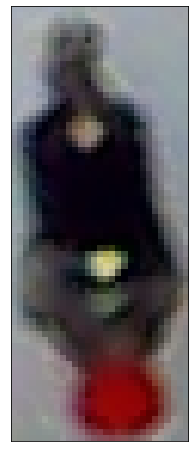

Imagenes/Completo/Switch1/rename/S1-24.png


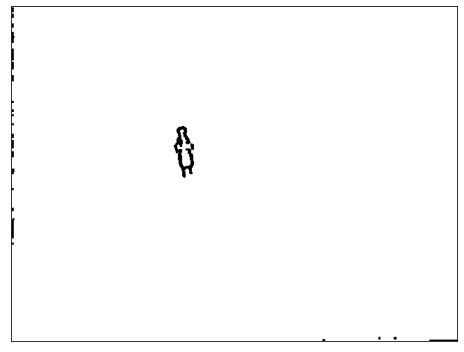

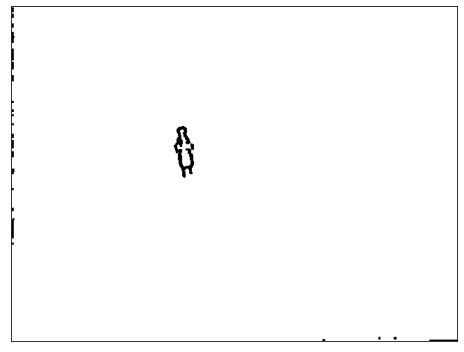

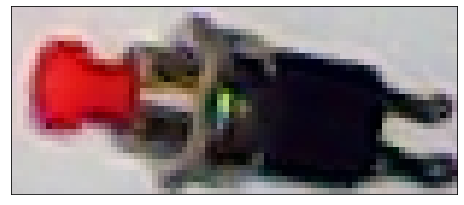

Imagenes/Completo/Switch1/rename/S1-25.png


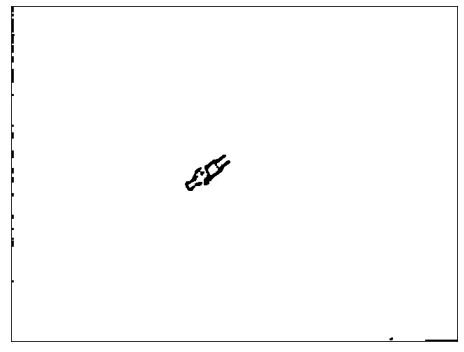

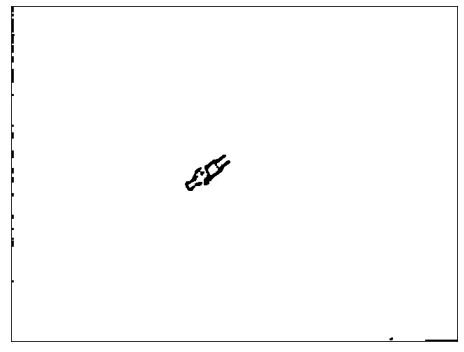

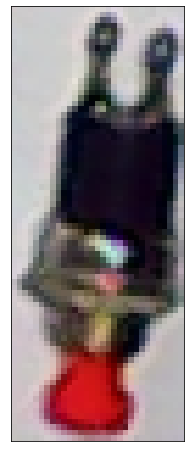

Imagenes/Completo/Switch1/rename/S1-26.png


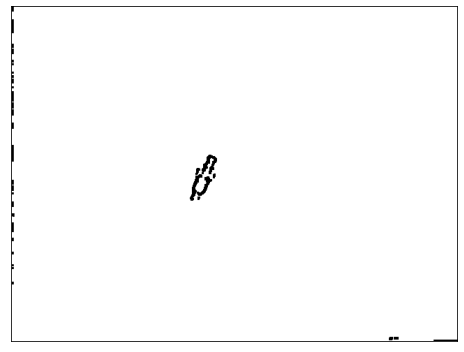

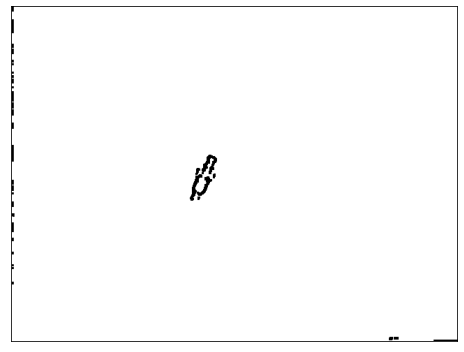

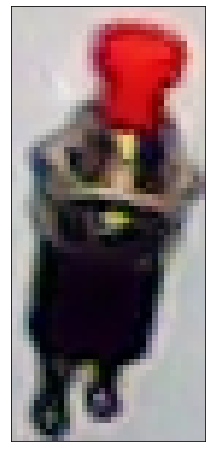

Imagenes/Completo/Switch1/rename/S1-27.png


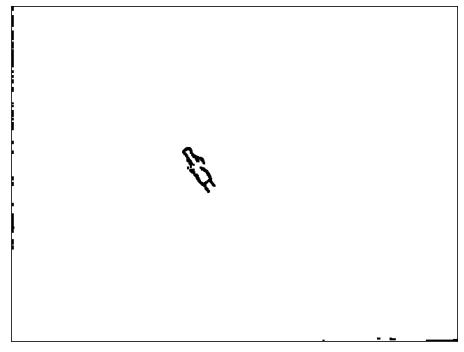

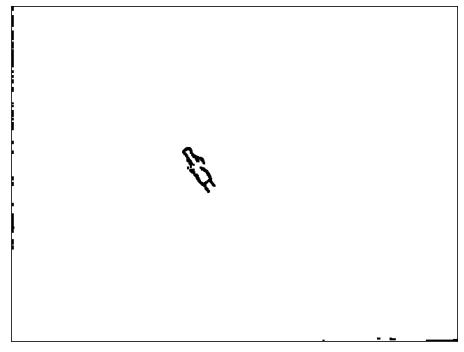

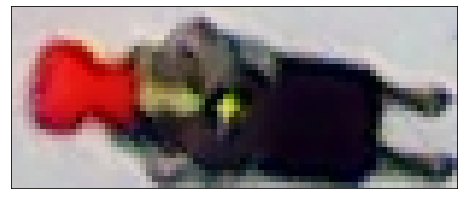

Imagenes/Completo/Switch1/rename/S1-28.png


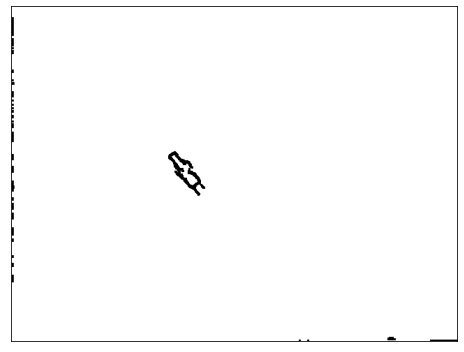

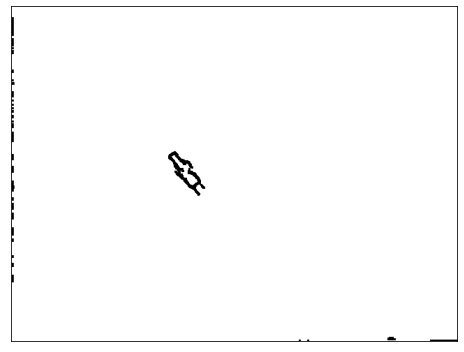

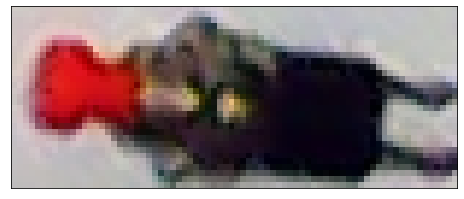

Imagenes/Completo/Switch1/rename/S1-29.png


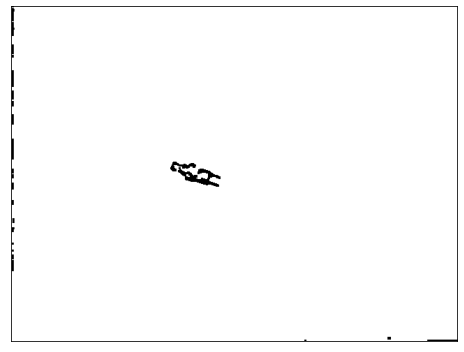

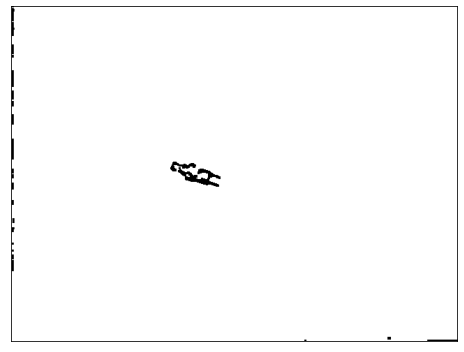

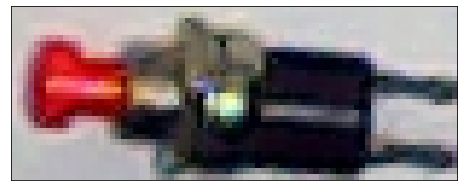

Imagenes/Completo/Switch1/rename/S1-3.png


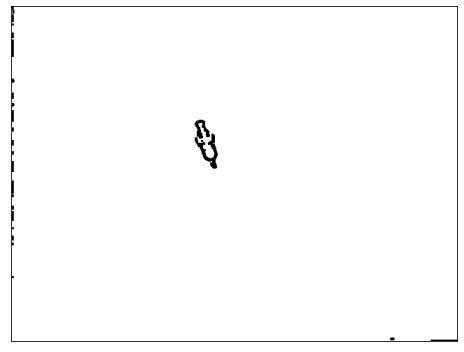

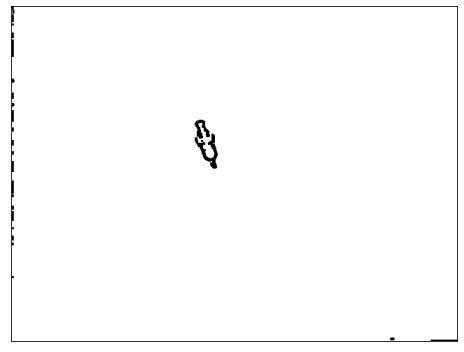

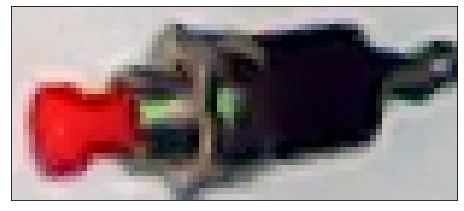

Imagenes/Completo/Switch1/rename/S1-4.png


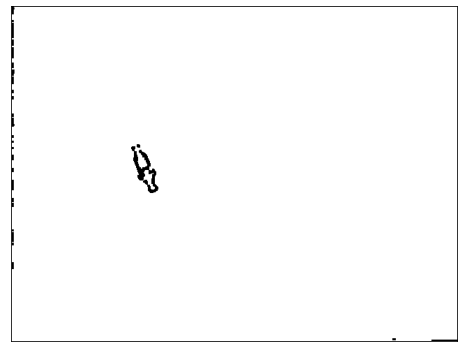

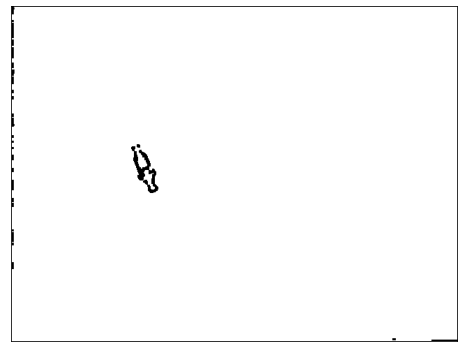

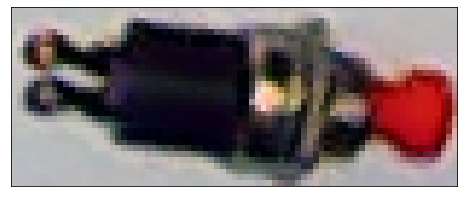

Imagenes/Completo/Switch1/rename/S1-5.png


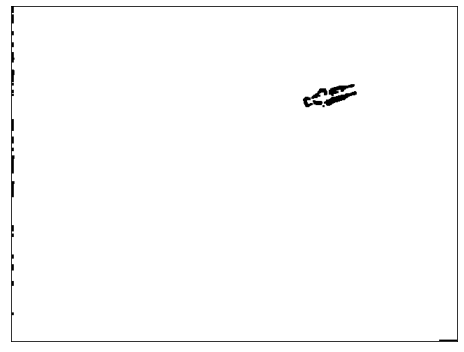

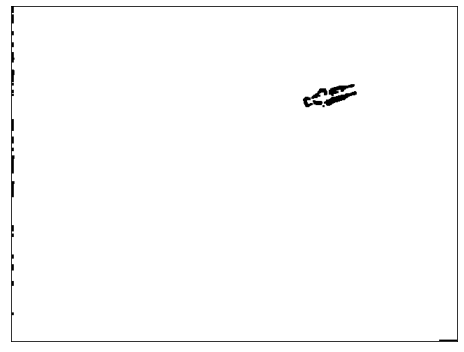

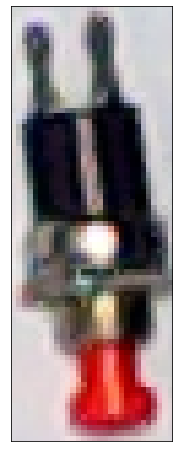

Imagenes/Completo/Switch1/rename/S1-6.png


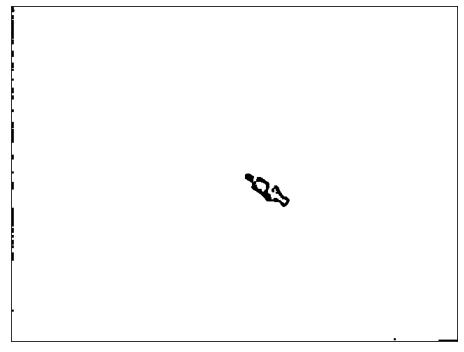

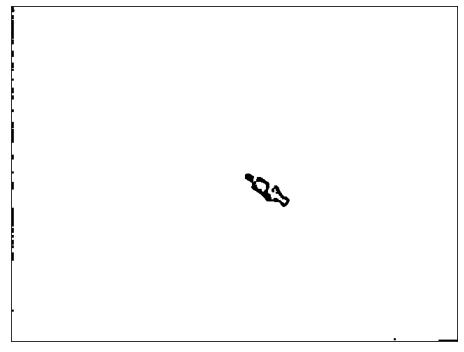

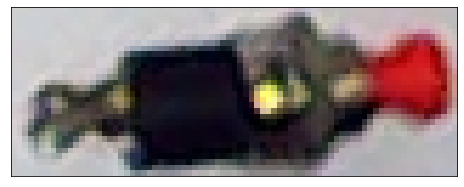

Imagenes/Completo/Switch1/rename/S1-7.png


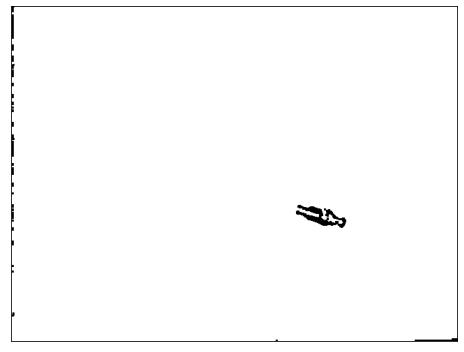

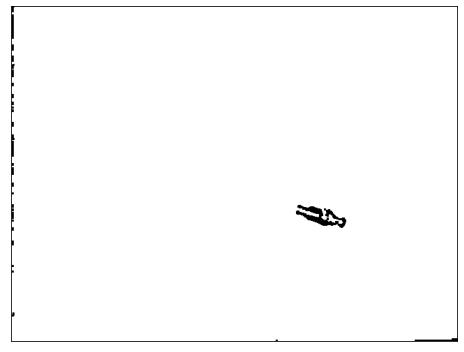

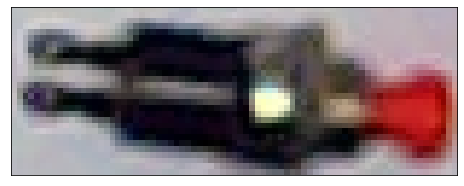

Imagenes/Completo/Switch1/rename/S1-8.png


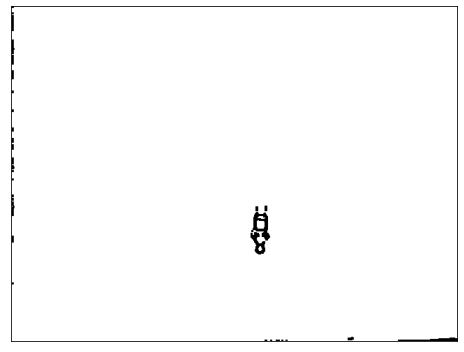

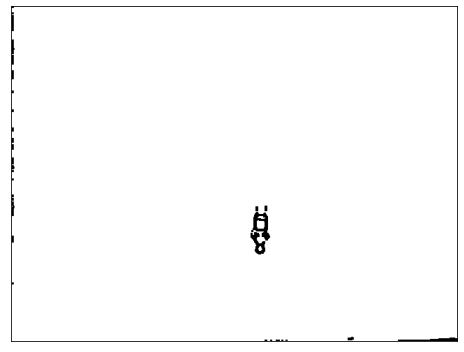

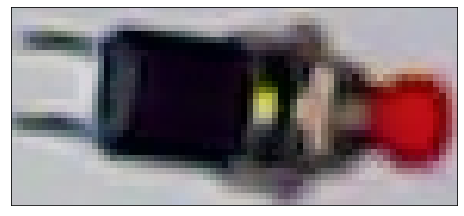

Imagenes/Completo/Switch1/rename/S1-9.png


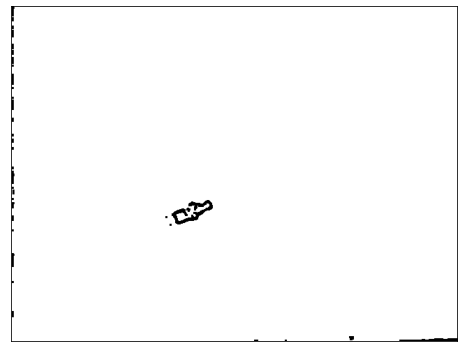

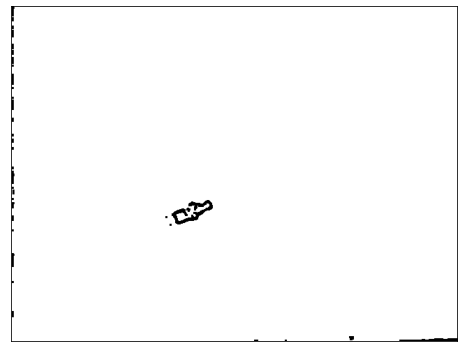

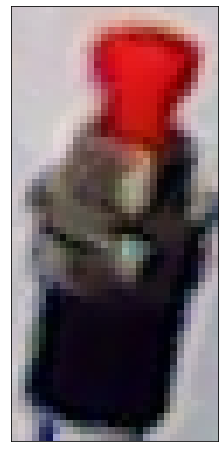

In [364]:
#Crop para imagenes solitarias
def ls1(path):    
    return [obj.name for obj in scandir(path) if obj.is_file()]

#Función para separar el nombre del archivo
def splitfilename(filename):
    sname=""
    sext=""
    i=filename.rfind(".")
    if(i!=0):
        n=len(filename)
        j=n-i-1
        sname=filename[0:i]
        sext=filename[-j:]    
    return sext, sname

#Arreglo de imagenes de prueba
test_images = []

for i in range(1,2):
    path = "Imagenes/Completo/Switch"+str(i)+"/rename/"
    #Files es un arreglo con todos los nombres de las imagenes que están dentro del path
    files=ls1(path)
    
    for file in files:
        # Es el path + el nombre de la imagen
        filea=path + file # archivo original
        #sext es la extensión y sfilename y es el nombre del archivo sin la extensión
        sext, sfilename = splitfilename(file)    
        #creación del path de archivo ya con el crop
        filec=path+"/crop/" + sfilename + ".png" # archivo crop    
        print(filea)
        src = cv2.imread(filea)
        src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
        src_color = cv2.cvtColor(src, cv2.COLOR_BGR2RGB )
        src_filter = gaussian(src_gray)
        #closing
        kernel = np.ones((3,3),np.uint8)
        element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
        closing = cv2.morphologyEx(src_filter, cv2.MORPH_CLOSE, kernel, iterations = 1)
        plotimg(closing)
        
        ret,thresh1 = cv2.threshold(closing,190,255,cv2.THRESH_BINARY)
        plotimg(thresh1)
        for i in range(len(thresh1)):
            for j in range(5):
                thresh1[i,j] = 255
        for i in range(-1,-9,-1):
            for j in range(len(thresh1)):
                thresh1[i,j] = 255
                
        #erode

        element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
        kernel = np.ones((3,3),np.uint8)
        erosion = cv2.erode(thresh1,kernel,iterations = 1)
        
        ####
        
        img_copy = thresh1.copy()

        contours, hierarchy = cv2.findContours(erosion, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

        outer_contours = []
        src_color = cv2.cvtColor(src, cv2.COLOR_BGR2RGB )
        color_copy = src_color.copy()

        for i in range(len(hierarchy[0])):
            if hierarchy[0,i,3] < 1:
                outer_contours.append(contours[i])
            else:
                continue
        

        rects = []
        h_max = 0
        w_max = 0
    
        for i in range(len(outer_contours)):
    
            rect = cv2.minAreaRect(outer_contours[i])
            box = cv2.boxPoints(rect)
            box = np.int0(box)
    
            x ,y ,w, h = area(box)
            if (w*h >= src_color.shape[0]*src_color.shape[1]) or w*h < 250 or w*h > 200000:
                continue
            else:
                cv2.drawContours(src_color,[box],0,(0,0,255),2)
                rect = cv2.minAreaRect(outer_contours[i])
                w,h = rect[1]
                x,y = rect[0]
                if w+x > w_max:
                    w_max = w+x
                elif y+h > h_max:
                    h_max = h+y
                rects.append(rect)
                
            ####
            
        h_max=0
        w_max=0
        crop_images = []
        for i in range(len(rects)):
            #cropimage(src_color,area)
            # rotate img
            rect = rects[i]
            angle = rect[2]
            rows,cols = color_copy.shape[0], color_copy.shape[1]
            M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
            img_rot = cv2.warpAffine(color_copy,M,(cols,rows))
        
            # rotate bounding box
            rect0 = (rect[0], rect[1], 0.0)
            box = cv2.boxPoints(rect)
            pts = np.int0(cv2.transform(np.array([box]), M))[0]    
            pts[pts < 0] = 0

            # crop
            img_crop = img_rot[pts[1][1]:pts[0][1], 
                           pts[1][0]:pts[2][0]]
            crop_images.append(img_crop)
            plotimg(img_crop)
    
            w = len(img_crop)
            h = len(img_crop[0])
            if w > w_max:
                w_max = w
            if h > h_max:
                h_max = h
                
        blank = np.zeros((100, 100,3), dtype = 'uint8')*255
        
        #Imagenes normalizadas
        norm_images = []
        for img in crop_images:
            blank = np.ones((100, 100,3), dtype = 'uint8')*255
            w1 = 100
            h1 = 100
            w2 = len(img[1])
            h2 = len(img)
            x_ini = (w1-w2)//2
            y_ini = (h1-h2)//2
            for i in range(len(img)):
                for j in range(len(img[1])):
                    for k in range(3):
                        blank[x_ini+j][y_ini+i][k] = img[i][j][k]
            norm_images.append(blank)
            blank = cv2.cvtColor(blank, cv2.COLOR_RGB2BGR)
            cv2.imwrite(filec, blank)
        
        
        
    
    



In [336]:
src = cv2.imread("Imagenes/Completo/Switch13/rename/crop/S13-4.png")
src_color = cv2.cvtColor(src, cv2.COLOR_BGR2RGB )

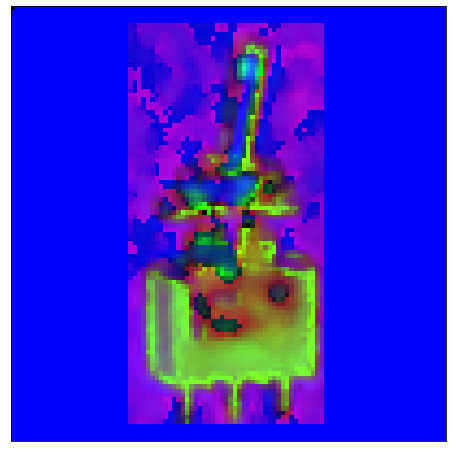

In [341]:
img_hsv = cv2.cvtColor(src_color, cv2.COLOR_RGB2HSV)
plotimg(img_hsv)

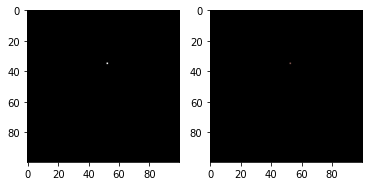

In [347]:
# Elegimos el umbral de rojo en HSV
# Elegimos el umbral de rojo en HSV
umbral_bajo1 = (100,100,100)
umbral_alto1 = (140,255,255)
# Elegimos el segundo umbral de rojo en HSV
umbral_bajo2 = (0,100,100)
umbral_alto2 = (10,255,255)
# hacemos la mask y filtramos en la original
mask1 = cv2.inRange(img_hsv, umbral_bajo1, umbral_alto1)
mask2 = cv2.inRange(img_hsv, umbral_bajo2, umbral_alto2)
mask = mask1 + mask2
res = cv2.bitwise_and(src_color, src_color, mask=mask)
# imprimimos los resultados
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

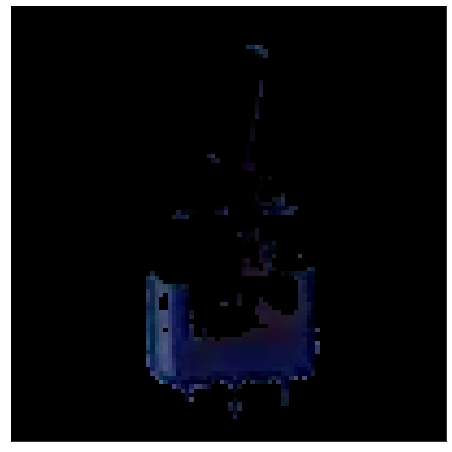

In [355]:
umbral_bajo = (100,100,0)
umbral_alto = (140,255,255)
# hacemos la mask y filtramos en la original
mask = cv2.inRange(img_hsv, umbral_bajo, umbral_alto)
res = cv2.bitwise_and(src_color, src_color, mask=mask)
plotimg(res)

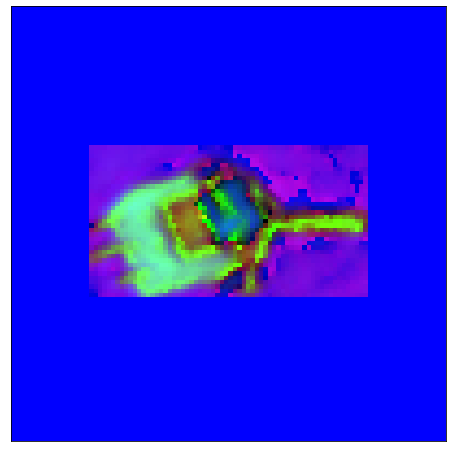

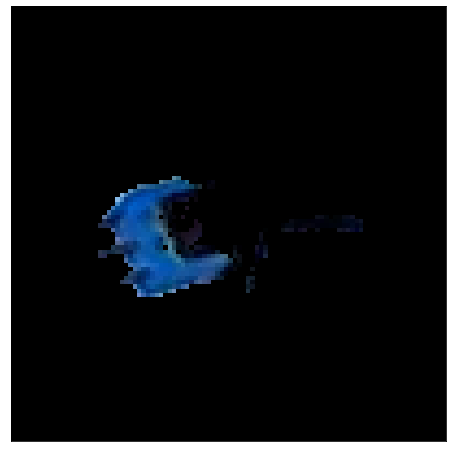

In [384]:
src = cv2.imread("Imagenes/Completo/Switch12/rename/crop/S12-2.png")
src_color = cv2.cvtColor(src, cv2.COLOR_BGR2RGB )

img_hsv = cv2.cvtColor(src_color, cv2.COLOR_RGB2HSV)
plotimg(img_hsv)

umbral_bajo = (100,100,0)
umbral_alto = (140,255,255)
# hacemos la mask y filtramos en la original
mask = cv2.inRange(img_hsv, umbral_bajo, umbral_alto)
res = cv2.bitwise_and(src_color, src_color, mask=mask)
plotimg(res)


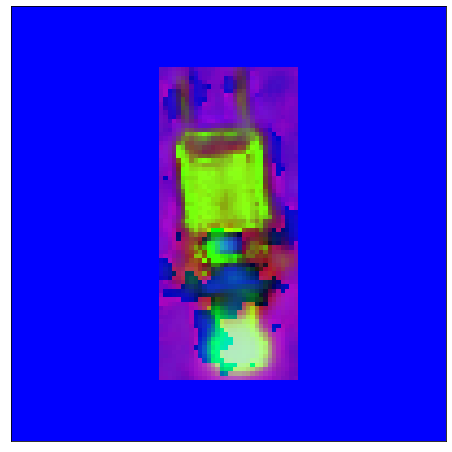

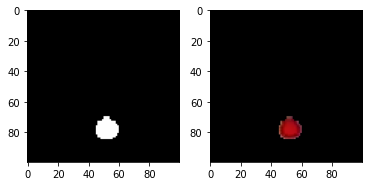

In [376]:
src = cv2.imread("Imagenes/Completo/Switch1/rename/crop/S1-8.png")
src_color = cv2.cvtColor(src, cv2.COLOR_BGR2RGB )

img_hsv = cv2.cvtColor(src_color, cv2.COLOR_RGB2HSV)
plotimg(img_hsv)

umbral_bajo1 = (170,100,100)
umbral_alto1 = (179,255,255)
# Elegimos el segundo umbral de rojo en HSV
umbral_bajo2 = (0,100,100)
umbral_alto2 = (10,255,255)
# hacemos la mask y filtramos en la original
mask1 = cv2.inRange(img_hsv, umbral_bajo1, umbral_alto1)
mask2 = cv2.inRange(img_hsv, umbral_bajo2, umbral_alto2)
mask = mask1 + mask2
res = cv2.bitwise_and(src_color, src_color, mask=mask)
# imprimimos los resultados
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()


In [383]:
#Rojo Switch1
contador_pixeles = 0
for i in range(100):
    for j in range(100):
        if mask[i,j] != 0:
            contador_pixeles += 1
contador_pixeles/=1000
contador_pixeles      
    

0.173

In [385]:
#Azul Switch 13
contador_pixeles = 0
for i in range(100):
    for j in range(100):
        if mask[i,j] != 0:
            contador_pixeles += 1
contador_pixeles/=1000
contador_pixeles      

0.581

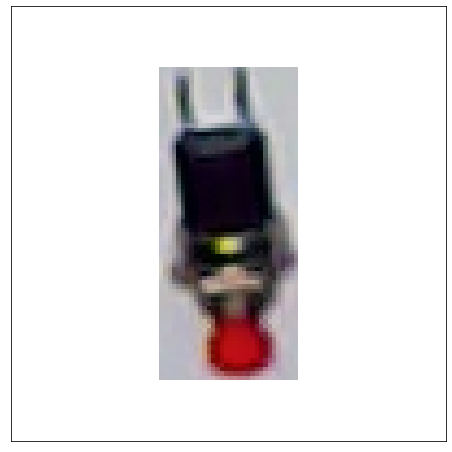

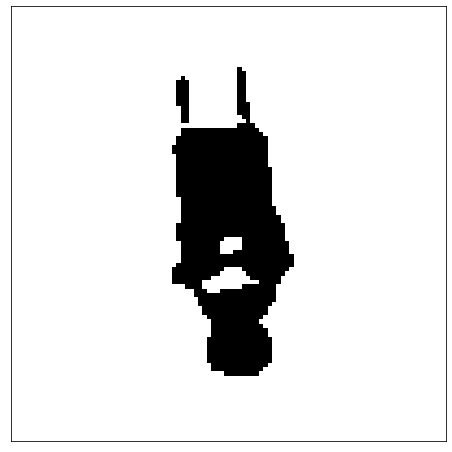

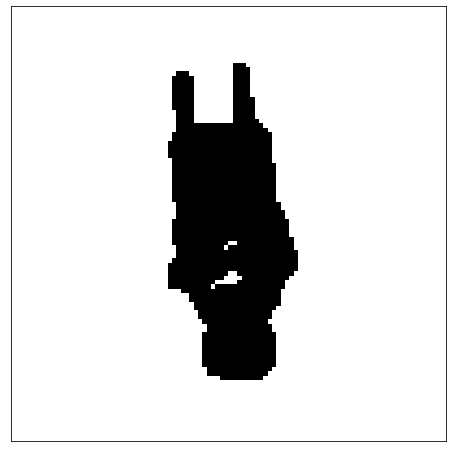

In [401]:
src = cv2.imread("Imagenes/Completo/Switch1/rename/crop/S1-8.png")
src_color = cv2.cvtColor(src, cv2.COLOR_BGR2RGB )
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
plotimg(src_color)


#Binary Treshold 
ret,thresh1 = cv2.threshold(src_gray,120,255,cv2.THRESH_BINARY)
plotimg(thresh1)

#erode
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(thresh1,kernel,iterations = 1)
plotimg(erosion)

from skimage.measure import block_reduce







In [417]:
img = block_reduce(erosion, block_size=(4, 4), func=np.mean)

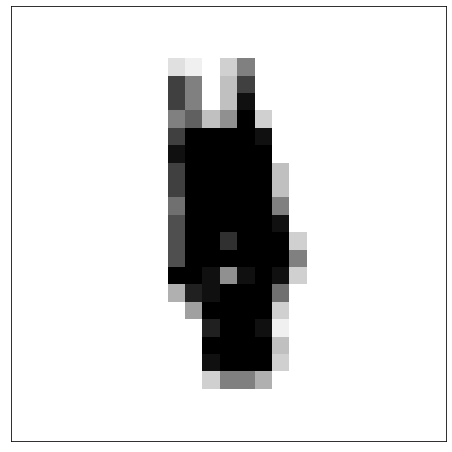

In [418]:
plotimg(img)

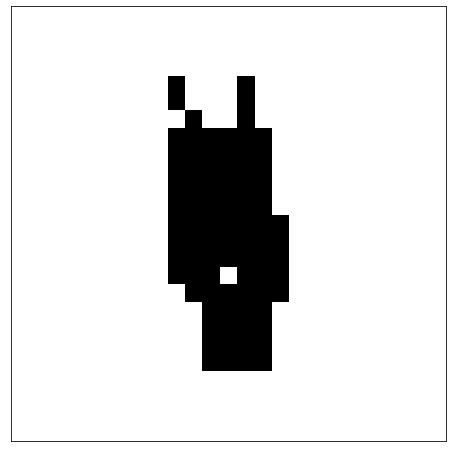

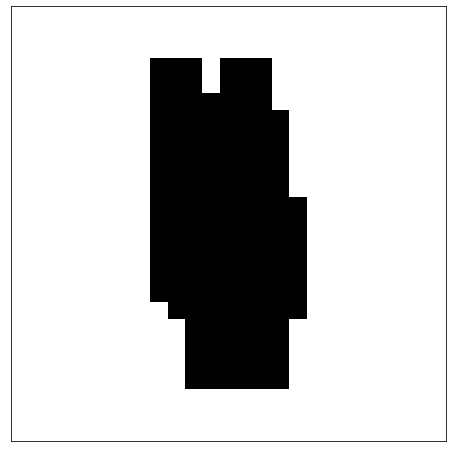

In [419]:
#Binary Treshold 
ret,thresh1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)
plotimg(thresh1)

#erode
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(thresh1,kernel,iterations = 1)
plotimg(erosion)